In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import jenkspy

In [2]:
df = pd.read_excel(r"C:\Users\Aditya P J\Documents\Magang dan KKN\Magang\Proyek\data_cleanedbronze2_PGN.xlsx")
X = df[['Terukur m3']].values
df.head()

,SBU,Kode Area,No Ref,Account Name,Sektor Industri,Periode,Terukur m3,Terukur mmbtu,Batas Min,Batas Max,segmentasi
0,SOR I,17,232992,"GRAND SARANA MANDIRI, PT",LAIN-LAIN (OTHERS),2023-01-01,10947.4475,390.5719,350,1750,Bronze 2
1,SOR I,17,232992,"GRAND SARANA MANDIRI, PT",LAIN-LAIN (OTHERS),2023-02-01,10856.5441,387.7854,350,1750,Bronze 2
2,SOR I,17,232992,"GRAND SARANA MANDIRI, PT",LAIN-LAIN (OTHERS),2023-03-01,13294.6098,472.5794,350,1750,Bronze 2
3,SOR I,17,232992,"GRAND SARANA MANDIRI, PT",LAIN-LAIN (OTHERS),2023-04-01,13508.0884,481.3496,350,1750,Bronze 2
4,SOR I,17,232992,"GRAND SARANA MANDIRI, PT",LAIN-LAIN (OTHERS),2023-05-01,14417.3913,516.1667,350,1750,Bronze 2


In [3]:
df_mean = df.groupby('Account Name')['Terukur mmbtu'].mean().reset_index()
df_mean.rename(columns={'Terukur mmbtu': 'mean_terukur_mmbtu'}, inplace=True)

n_classes = 2 
breaks = jenkspy.jenks_breaks(df_mean['mean_terukur_mmbtu'].values, n_classes)
print(f'Jenks Breaks: {breaks}')

# Fungsi untuk assign cluster Jenks
def assign_jenks_cluster(x, breaks):
    for i in range(len(breaks) - 1):
        if breaks[i] <= x < breaks[i + 1]:
            return i
    if x == breaks[-1]:
        return len(breaks) - 2
    return np.nan

df_mean['jenks_cluster'] = df_mean['mean_terukur_mmbtu'].apply(lambda x: assign_jenks_cluster(x, breaks))


Jenks Breaks: [175.8384, 1003.8849555555555, 3252.798]


In [4]:
summary = df_mean.groupby('jenks_cluster')['mean_terukur_mmbtu'].agg(['count', 'mean', 'min', 'max']).reset_index()
summary['percentage'] = summary['count'] / len(df_mean) * 100
print(summary)


   jenks_cluster  count         mean          min          max  percentage
0              0    619   576.248388   175.838400  1000.224389   71.809745
1              1    243  1436.823560  1003.884956  3252.798000   28.190255


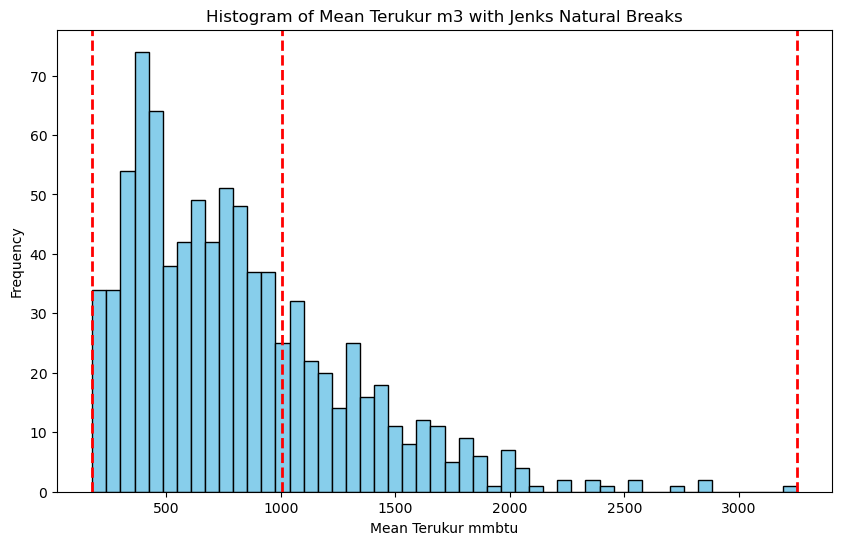

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df_mean['mean_terukur_mmbtu'], bins=50, color='skyblue', edgecolor='black')
for b in breaks:
    plt.axvline(b, color='red', linestyle='--', linewidth=2)
plt.title('Histogram of Mean Terukur m3 with Jenks Natural Breaks')
plt.xlabel('Mean Terukur mmbtu')
plt.ylabel('Frequency')
plt.show()


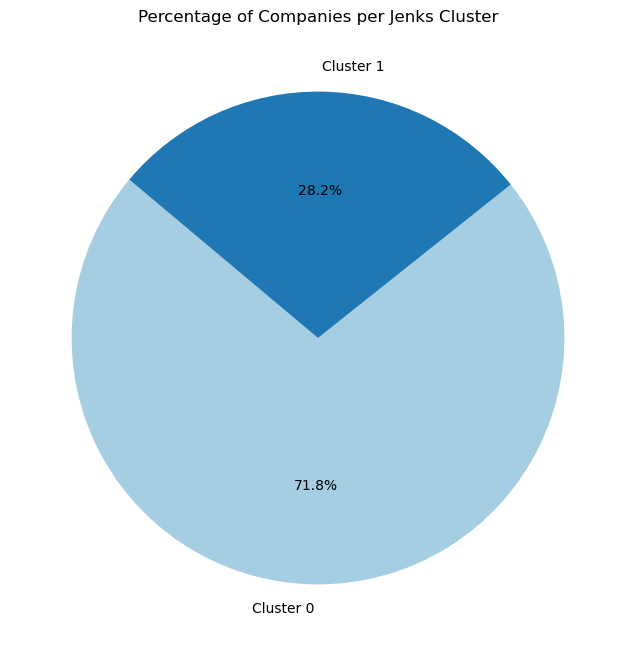

In [6]:
counts = df_mean['jenks_cluster'].value_counts().sort_index()
labels = [f'Cluster {i}' for i in counts.index]
plt.figure(figsize=(8,8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Percentage of Companies per Jenks Cluster')
plt.show()


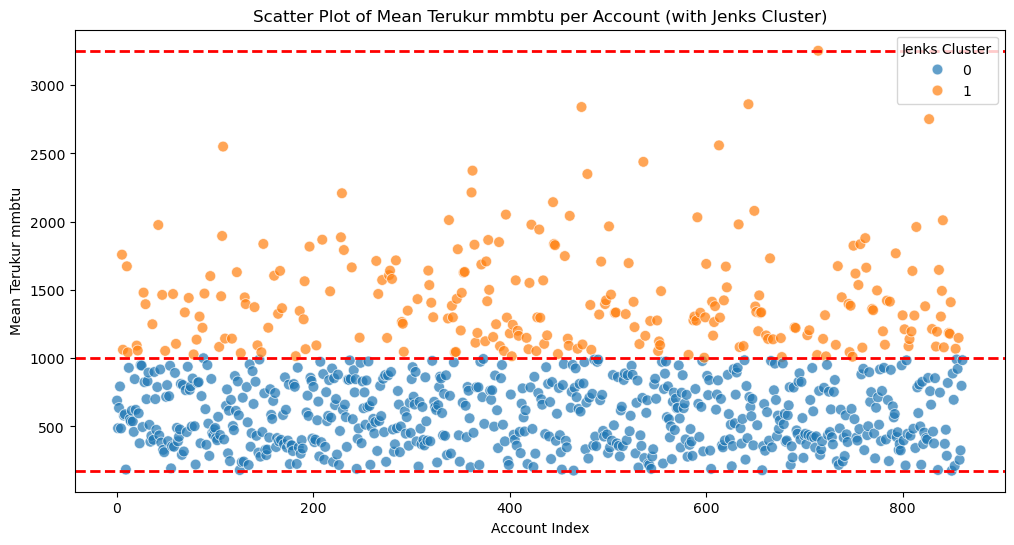

In [7]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=range(len(df_mean)), 
                y='mean_terukur_mmbtu', 
                hue='jenks_cluster', 
                data=df_mean, 
                palette='tab10', 
                s=60, 
                alpha=0.7)

# Garis Jenks
for b in breaks:
    plt.axhline(b, color='red', linestyle='--', linewidth=2)

plt.title('Scatter Plot of Mean Terukur mmbtu per Account (with Jenks Cluster)')
plt.xlabel('Account Index')
plt.ylabel('Mean Terukur mmbtu')
plt.legend(title='Jenks Cluster')
plt.show()


In [15]:
cluster_stats = df_mean.groupby('jenks_cluster')['mean_terukur_mmbtu'].describe()

print('\nDeskripsi Statistik Volume Pemakaian per Cluster :')
print(cluster_stats.to_markdown(tablefmt='grid', floatfmt='.2f'))


Deskripsi Statistik Volume Pemakaian per Cluster :
+-----------------+---------+---------+--------+---------+---------+---------+---------+---------+
|   jenks_cluster |   count |    mean |    std |     min |     25% |     50% |     75% |     max |
+=================+=========+=========+========+=========+=========+=========+=========+=========+
|               0 |  619.00 |  576.25 | 225.71 |  175.84 |  391.24 |  561.63 |  773.69 | 1000.22 |
+-----------------+---------+---------+--------+---------+---------+---------+---------+---------+
|               1 |  243.00 | 1436.82 | 376.96 | 1003.88 | 1149.02 | 1336.13 | 1631.32 | 3252.80 |
+-----------------+---------+---------+--------+---------+---------+---------+---------+---------+


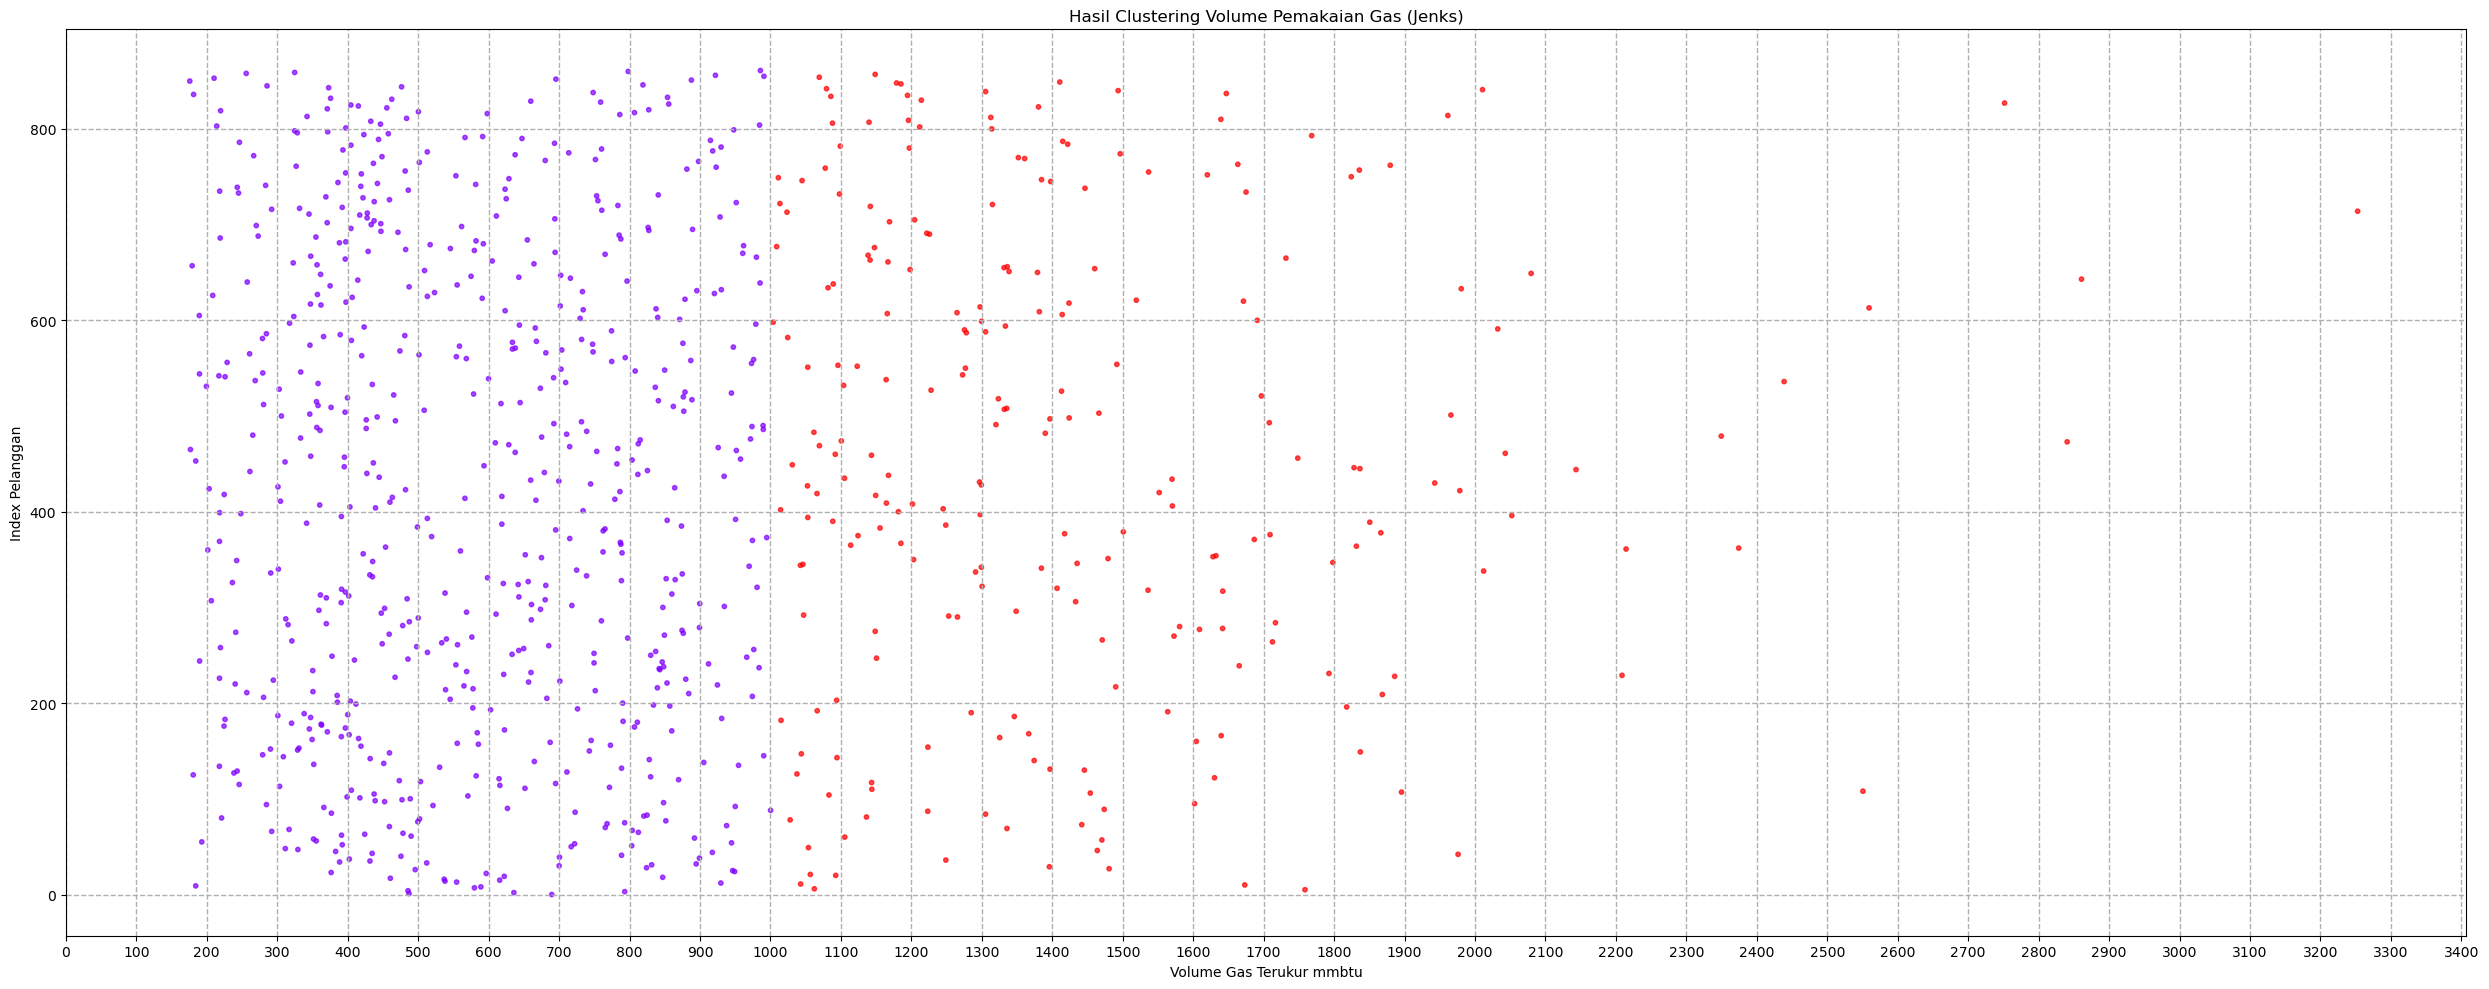

In [29]:
plt.figure(figsize=(25, 10))
plt.scatter(df_mean['mean_terukur_mmbtu'], 
            df_mean.index, 
            c=df_mean['jenks_cluster'],  # pakai cluster, bukan nilai m3
            cmap='rainbow', 
            s=10, 
            alpha=0.7)

plt.title('Hasil Clustering Volume Pemakaian Gas (Jenks)')
plt.xlabel('Volume Gas Terukur mmbtu')
plt.ylabel('Index Pelanggan')

max_x = df['Terukur mmbtu'].max()
plt.xticks(np.arange(0, max_x, 100))
plt.grid(True, linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()
